In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import os

os.chdir("../")

import get_data as gd

# Parâmetros gerais
columns = ['id', 'cpu', 'memory', 'storage', 'bandwidth']
topology = 'germany'


Todos os gráficos foram gerados e salvos na pasta 'plots/'.


In [ ]:

# Carregar resultados do modelo e heurística
heuristic_results = pd.read_pickle(f'results/placements/h3_min_hops_{topology}_place.pkl')
model_results = pd.read_pickle(f'results/placements/m3_min_hops_{topology}_30min_place.pkl')

# Função para obter os dados da topologia
def get_data_nodes():
    df_nodes, df_edges = gd.get_topology(topology, capacity_percent=1.0)
    G = gd.create_graph_topology(df_nodes, df_edges)
    return df_nodes[columns], df_edges, G

# Carregar a topologia
nodes, edges, G = get_data_nodes()

# Obter posições dos nós
pos = nx.get_node_attributes(G, 'pos')

# Função para calcular os caminhos de uma lista de nós
def get_network_paths(G, node_list):
    edge_list = [nx.shortest_path(G, node_list[i], node_list[i+1]) for i in range(len(node_list)-1)]
    return [(a, b) for path in edge_list for a, b in zip(path, path[1:])]

# Escolha do espelhamento ('x', 'y', 'both' ou None)
mirror_axis = 'x'

# Aplicar espelhamento na posição dos nós
def apply_mirroring(pos, axis):
    if axis == 'x':
        return {node: (x, -y) for node, (x, y) in pos.items()}
    elif axis == 'y':
        return {node: (-x, y) for node, (x, y) in pos.items()}
    elif axis == 'both':
        return {node: (-x, -y) for node, (x, y) in pos.items()}
    return pos  # Sem espelhamento

mirrored_pos = apply_mirroring(pos, mirror_axis)

# Gerar gráficos para todas as aplicações (App0 até App19)
for i in range(20):
    app = f'App{i}'
    
    if app not in heuristic_results or app not in model_results:
        continue  # Pular se a aplicação não existir nos resultados
    
    # Obter listas de nós para o modelo e heurística
    node_list = [x[0] for x in model_results[app]]
    node_list_dist = list(dict.fromkeys(node_list))  # Remover duplicatas mantendo a ordem
    network_path = get_network_paths(G, node_list_dist)

    node_list_2 = [x[0] for x in heuristic_results[app]]
    node_list_dist_2 = list(dict.fromkeys(node_list_2))
    network_path_2 = get_network_paths(G, node_list_dist_2)

    # Criar figura
    fig = plt.figure(figsize=(12, 12), dpi=60)
    
    # Desenhar as arestas de fundo
    nx.draw_networkx_edges(G, mirrored_pos, edge_color='gray', alpha=0.7, width=1.5)

    # Desenhar os nós normais
    nx.draw_networkx_nodes(G, mirrored_pos, node_size=400, node_color='deepskyblue', edgecolors='black', linewidths=1.5)

    # Destacar caminhos principais (azul) e secundários (laranja)
    nx.draw_networkx_edges(G, mirrored_pos, edgelist=network_path, width=5, alpha=0.9, edge_color="#1f77b4", style="solid")
    nx.draw_networkx_edges(G, mirrored_pos, edgelist=network_path_2, width=4, alpha=0.9, edge_color="#ff7f0e", style="dashed")

    # Adicionar rótulos dos nós
    nx.draw_networkx_labels(G, mirrored_pos, font_color='black', font_size=10)

    # Criar legendas
    legend_patches = [
        mpatches.Patch(color='#1f77b4', label=f'M-3: {", ".join(map(str, node_list_dist))}'),
        mpatches.Patch(color='#ff7f0e', label=f'H-3: {", ".join(map(str, node_list_dist_2))}')
    ]
    
    # Adicionar a legenda
    legend = plt.legend(handles=legend_patches, fontsize=12, loc="upper right", frameon=True)
    legend.get_frame().set_facecolor("white")
    legend.get_frame().set_edgecolor("black")

    # Adicionar título da aplicação
    plt.title(f'{app}', fontsize=20, fontweight='bold', pad=20)

    # Adicionar grade discreta
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Ajustar layout
    plt.tight_layout()

    # Salvar o gráfico no formato SVG
    plt.savefig(f'graphs/plots/path_hops_m3_h3_{topology}_{app}.svg', format='svg', bbox_inches='tight')

    # Fechar a figura para evitar consumo excessivo de memória
    plt.close(fig)

print("Todos os gráficos foram gerados e salvos na pasta 'plots/'.")

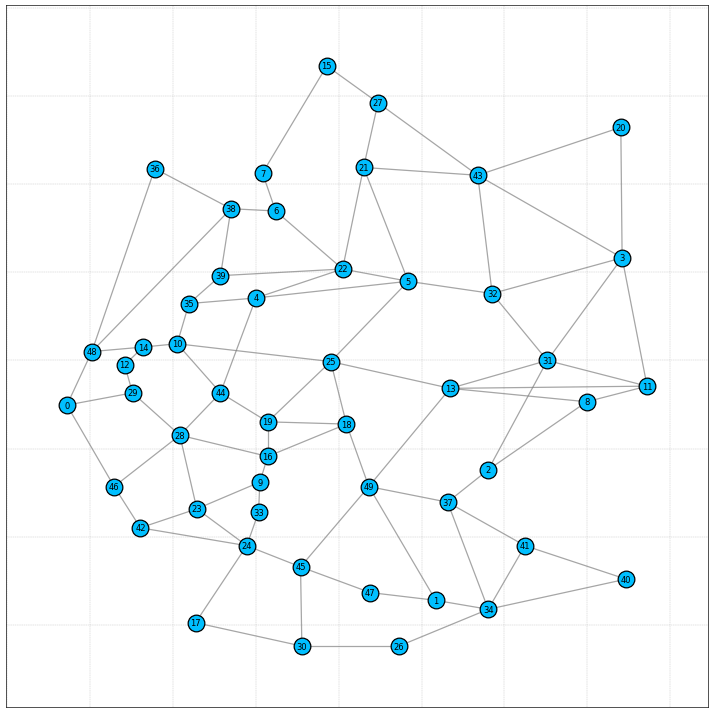

In [2]:


import matplotlib.pyplot as plt
import networkx as nx

# Configuração do tamanho do gráfico
fig = plt.figure(1, figsize=(12, 12), dpi=60)

# Posição dos nós
pos = nx.get_node_attributes(G, 'pos')

# Escolha o tipo de espelhamento
mirror_axis = 'x'  # Opções: 'x', 'y', ou 'both'

if mirror_axis == 'x':
    # Espelhamento no eixo X (inverte Y)
    mirrored_pos = {node: (coords[0], -coords[1]) for node, coords in pos.items()}
elif mirror_axis == 'y':
    # Espelhamento no eixo Y (inverte X)
    mirrored_pos = {node: (-coords[0], coords[1]) for node, coords in pos.items()}
elif mirror_axis == 'both':
    # Espelhamento em ambos os eixos
    mirrored_pos = {node: (-coords[0], -coords[1]) for node, coords in pos.items()}

# Configuração de cores e estilos
node_color = 'deepskyblue'
node_border_color = 'black'
edge_color = 'gray'
font_color = 'black'
font_size = 10
edge_label_font_size = 8
node_size = 400

# Plotando os nós e bordas
nx.draw_networkx_edges(G, mirrored_pos, edge_color=edge_color, alpha=0.7, width=1.5)
nx.draw_networkx_nodes(G, mirrored_pos, node_size=node_size, node_color=node_color, edgecolors=node_border_color, linewidths=1.5)
nx.draw_networkx_labels(G, mirrored_pos, font_color=font_color, font_size=font_size)

# Adicionando labels das arestas
labels = nx.get_edge_attributes(G, '')
nx.draw_networkx_edge_labels(G, mirrored_pos, edge_labels=labels, font_size=edge_label_font_size, font_color='darkgreen')

# Configurando o título
# title = f'Topology {topology} with {len(G.nodes)} nodes (Mirrored on {mirror_axis.upper()} axis)'
title = ''
plt.title(title, fontsize=18, fontweight='bold', pad=20)

# Adicionando grade
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Ajustando layout
plt.tight_layout()


plt.savefig('graphs/plots/graph_of_germany_topology.svg', format='svg', bbox_inches='tight')
# Exibindo o gráfico
plt.show()
